<a href="https://colab.research.google.com/github/rehanasafrin/customer-review-sentiment-analysis/blob/main/sentiment_analysis_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SENTIMENT ANALYSIS REPORT

Review 1:
Text: Absolutely love this product! Best purchase I've made this year. Quality is exceptional!...
Sentiment: POSITIVE (Score: 0.82)

Review 2:
Text: Terrible experience. Product stopped working after 2 days. Waste of money....
Sentiment: NEGATIVE (Score: -0.60)

Review 3:
Text: It's okay for the price, but could be better. Does the job....
Sentiment: POSITIVE (Score: 0.50)

Review 4:
Text: Amazing value! Highly recommend to everyone. Features are fantastic....
Sentiment: POSITIVE (Score: 0.44)

Review 5:
Text: Disappointed with the quality. Expected more based on the price....
Sentiment: NEUTRAL (Score: -0.12)

Review 6:
Text: Good product overall. Satisfied with my purchase....
Sentiment: POSITIVE (Score: 0.40)

Review 7:
Text: Horrible customer service and the product is mediocre at best....
Sentiment: NEUTRAL (Score: -0.17)

Review 8:
Text: Perfect! Exactly what I needed. Five stars!...
Sentiment: POSITIVE (Score: 0.66)

Review 9:
Text: Not bad, 

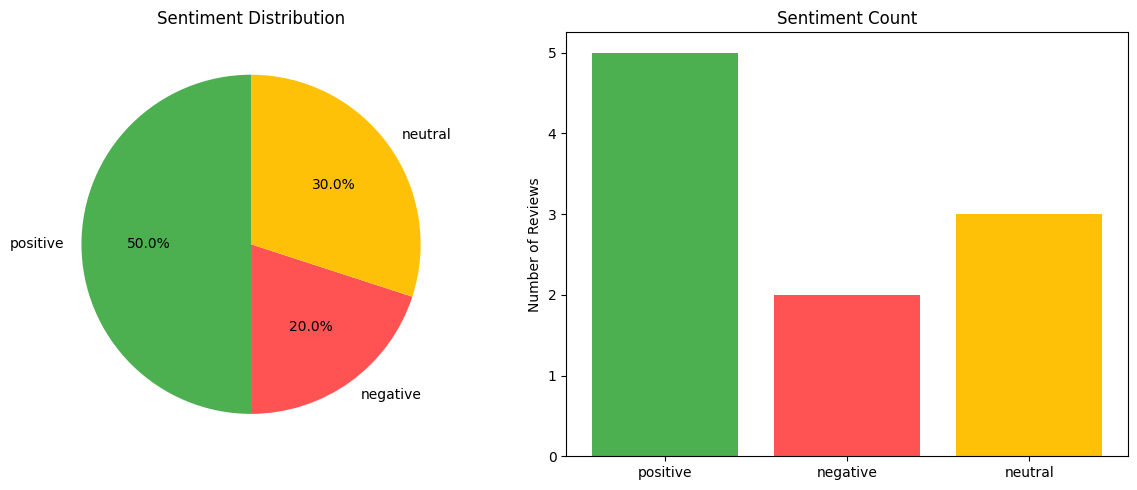

In [2]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
from collections import Counter
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

class SentimentAnalyzer:
    def __init__(self):
        self.sentiment_thresholds = {
            'positive': 0.3,
            'negative': -0.3,
            'neutral': (-0.3, 0.3)
        }
        self.actions = {
            'high_positive': " OFFER: Create special promotions and highlight this product in marketing campaigns",
            'moderate_positive': " RECOMMEND: Feature in recommendations and maintain current strategy",
            'high_negative': "UPGRADE: Urgent product improvement needed. Consider design changes or feature additions",
            'moderate_negative': " IMPROVE: Address specific pain points and enhance customer support",
            'neutral': " MONITOR: Gather more feedback and conduct A/B testing",
            'mixed': "OPTIMIZE: Target specific customer segments and refine messaging"
        }

    def analyze_sentiment_textblob(self, text):
        """Analyze sentiment using TextBlob (Rule-based approach)"""
        analysis = TextBlob(text)
        polarity = analysis.sentiment.polarity

        if polarity > self.sentiment_thresholds['positive']:
            return 'positive', polarity
        elif polarity < self.sentiment_thresholds['negative']:
            return 'negative', polarity
        else:
            return 'neutral', polarity

    def analyze_sentiment_ml(self, texts, model=None, train=False):
        """Machine Learning based sentiment analysis"""
        if train:
            # Prepare sample training data
            train_texts = [
                "Love this product! Amazing quality.",
                "Terrible experience, would not recommend.",
                "It's okay, nothing special.",
                "Best purchase ever!",
                "Waste of money, broke immediately.",
                "Decent product for the price."
            ]
            train_labels = ['positive', 'negative', 'neutral',
                          'positive', 'negative', 'neutral']

            vectorizer = TfidfVectorizer(max_features=1000)
            X_train = vectorizer.fit_transform(train_texts)

            model = LogisticRegression()
            model.fit(X_train, train_labels)

            return model, vectorizer

        # Transform and predict
        X = self.vectorizer.transform(texts)
        predictions = model.predict(X)
        return predictions

    def get_actionable_insights(self, sentiments):
        """Generate actionable insights based on sentiment distribution"""
        sentiment_counts = Counter(sentiments)
        total = len(sentiments)

        # Calculate percentages
        percentages = {sentiment: (count/total)*100
                      for sentiment, count in sentiment_counts.items()}

        insights = []

        # Determine primary action
        if percentages.get('positive', 0) > 60:
            primary_action = self.actions['high_positive']
        elif percentages.get('positive', 0) > 40:
            primary_action = self.actions['moderate_positive']
        elif percentages.get('negative', 0) > 60:
            primary_action = self.actions['high_negative']
        elif percentages.get('negative', 0) > 40:
            primary_action = self.actions['moderate_negative']
        elif percentages.get('neutral', 0) > 70:
            primary_action = self.actions['neutral']
        else:
            primary_action = self.actions['mixed']

        # Generate detailed insights
        insights.append(f"\n📊 SENTIMENT DISTRIBUTION:")
        insights.append(f"Positive: {percentages.get('positive', 0):.1f}%")
        insights.append(f"Negative: {percentages.get('negative', 0):.1f}%")
        insights.append(f"Neutral: {percentages.get('neutral', 0):.1f}%")

        insights.append(f"\n ECOMMENDED ACTION:")
        insights.append(primary_action)

        # Additional specific recommendations
        if percentages.get('positive', 0) > 50:
            insights.append("\n ADDITIONAL SUGGESTIONS:")
            insights.append("• Create limited-time offers")
            insights.append("• Launch referral program")
            insights.append("• Feature in seasonal promotions")
            insights.append("• Consider premium version")

        elif percentages.get('negative', 0) > 50:
            insights.append("\n ADDITIONAL SUGGESTIONS:")
            insights.append("• Conduct detailed customer surveys")
            insights.append("• Review quality control processes")
            insights.append("• Enhance warranty/return policy")
            insights.append("• Create product improvement roadmap")

        return "\n".join(insights)

    def visualize_sentiments(self, sentiments):
        """Create visualization of sentiment distribution"""
        sentiment_counts = Counter(sentiments)

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

        # Pie chart
        labels = sentiment_counts.keys()
        sizes = sentiment_counts.values()
        colors = ['#4CAF50', '#FF5252', '#FFC107']

        ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
        ax1.set_title('Sentiment Distribution')

        # Bar chart
        ax2.bar(labels, sizes, color=colors)
        ax2.set_title('Sentiment Count')
        ax2.set_ylabel('Number of Reviews')

        plt.tight_layout()
        plt.show()

    def analyze_reviews(self, reviews):
        """Main function to analyze a list of reviews"""
        print("=" * 60)
        print("SENTIMENT ANALYSIS REPORT")
        print("=" * 60)

        results = []
        for i, review in enumerate(reviews, 1):
            sentiment, score = self.analyze_sentiment_textblob(review)
            results.append(sentiment)

            print(f"\nReview {i}:")
            print(f"Text: {review[:100]}...")
            print(f"Sentiment: {sentiment.upper()} (Score: {score:.2f})")

        # Generate insights
        print("\n" + "=" * 60)
        print(self.get_actionable_insights(results))

        # Visualize
        self.visualize_sentiments(results)

        return results

# 2. **Sample Data & Usage**
def main():
    # Initialize analyzer
    analyzer = SentimentAnalyzer()

    # Sample customer reviews
    sample_reviews = [
        "Absolutely love this product! Best purchase I've made this year. Quality is exceptional!",
        "Terrible experience. Product stopped working after 2 days. Waste of money.",
        "It's okay for the price, but could be better. Does the job.",
        "Amazing value! Highly recommend to everyone. Features are fantastic.",
        "Disappointed with the quality. Expected more based on the price.",
        "Good product overall. Satisfied with my purchase.",
        "Horrible customer service and the product is mediocre at best.",
        "Perfect! Exactly what I needed. Five stars!",
        "Not bad, but not great either. Average product.",
        "Worst product ever! Don't waste your time or money."
    ]

    # Analyze reviews
    sentiments = analyzer.analyze_reviews(sample_reviews)

    return sentiments

if __name__ == "__main__":
    main()